# Assignment 3 - Introduction to Data Visualization

Read ALL the links in this notebook, except for the links with bullet points. Those are just for reference while completing the assignment.

## Exploratory Data Analysis & Data Visualization

Informative and concise visuals (or the lack of) can make or break research papers. They can help you find existing patterns in your data during [Exploratory Data Analysis](https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce) (EDA) or describing your research findings in the form of a paper or post. These [Fundamental Visualization Principles](https://www.textbook.ds100.org/ch/06/viz_principles.html) can help guide your thought process behind choosing types of graphs. Make sure to read both resources above and check out the useful references below:

- Comprehensive Data Viz [Catalogue](https://datavizcatalogue.com/)
- Data Viz [Reference Guides](https://coolinfographics.com/dataviz-guides)
- Data Viz in Python [(Coursera Videos)](https://www.coursera.org/lecture/python-for-data-visualization/introduction-to-data-visualization-OzwtO)

## Data Visualization in Python

There are several visuzaliation packages in Python, the most popular being [Matplotlib](https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39), [Seaborn](https://elitedatascience.com/python-seaborn-tutorial), and [Plotly](https://towardsdatascience.com/getting-started-with-plot-ly-3c73706a837c). Read the hyper-linked articles above to get familiar with how to use the packages. If you are wondering what the different use cases between the packages are, this article is a [Comparison of Common Python Visualization Packages](https://blog.magrathealabs.com/choosing-one-of-many-python-visualization-tools-7eb36fa5855f).

Read the [Introduction to Data Visualization in Python](https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed) article to get an introductory understanding of visualization purposes and syntax. Typically, data scientists work with all three packages in some shape or form, so we will be exploring these packages in this notebook.

Here are some common syntax & cheat sheets for each package:

- [Matplotlib](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)
- [Plot.ly](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf)
- [Bokeh](https://datacamp-community-prod.s3.amazonaws.com/f9511cf4-abb9-4f52-9663-ea93b29ee4b7)

## COVID-19 Dataset

For this assignment, we are going to be looking at New York Times' COVID-19 data tracker. The data is stored on [Github](https://medium.com/crowdbotics/a-dead-simple-intro-to-github-for-the-non-technical-f9d56410a856) and is updated daily with new confirmed cases and deads at the country, state, and county level. We will be focusing on the county level analysis. Read through the NYT COVID-19 [data repository](https://github.com/nytimes/covid-19-data) to understand how the data is collected and failed areas of data collection.

In [1]:
# Import statement is necessary to access package functions
import os
import numpy as np
import pandas as pd

data_path = "Data/"

In [2]:
# import your dataset
covid_counts = pd.read_csv(os.path.join(data_path + "us-counties.csv"))
covid_counts.head()

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0

## Part 1: Matplotlib

We will be using Matplotlib to build the basic. [An Introduction to Matplotlib](https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39) and the [Official Matplotlib Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf) should help familiarize you with the syntax.

In [3]:
# Import the package
import matplotlib.pyplot as plt

### Question 0 (Warm Up):

Graph a line plot with numbers from 1-10 as the x axis, and 11-20 as the y axis. Give the plot a title called "Question 0 Warm Up Plot". Label the x axis as "X Axis" and y axis as "Y Axis". Set the ticks on the x axis to go from 1-10 and ticks on the y axis to go from 11-20. Your plot should look like:
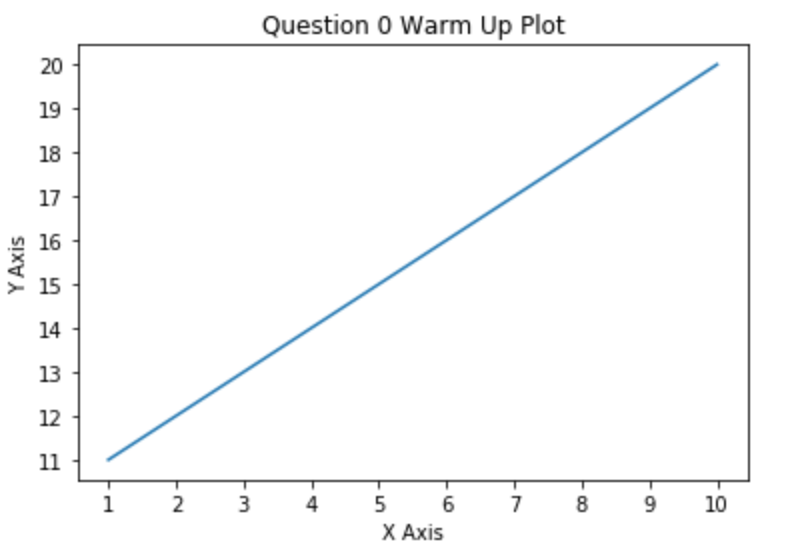

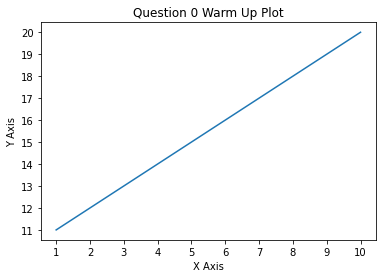

In [4]:
# Answer 0
plt.plot(np.arange(1,11), np.arange(11,21))
plt.title("Question 0 Warm Up Plot")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.xticks(np.arange(1,11))
plt.yticks(np.arange(11,21));

### Question 1 (Conceptual): 

What does "fips" in the dataset stand for?

### Answer 1:

Fips is the unique code assigned to each county. It can be used to identify each county.

### Question 2 (Conceptual):

Are the "cases" and "deaths" values cumulative or daily numbers for each county?

### Answer 2:

### Question 3:

How many distinct counties named "Orange" in the US have at least 1 reported case of COVID-19 as of 06/24/2020? Print out their state, county, fips, cases, and deaths as of 06/24/2020.

In [5]:
# Answer 3
orange_counts_06_24_20 = covid_counts[(covid_counts['county'] == "Orange") & 
                                      (covid_counts['date'] == '2020-06-24')]
print("Number of unique counties named Orange: ", orange_counts_06_24_20.shape[0])
orange_counts_06_24_20

Number of unique counties named Orange:  8


date  county           state     fips  cases  deaths
264330  2020-06-24  Orange      California   6059.0  11071     299
264480  2020-06-24  Orange         Florida  12095.0   6055      52
264861  2020-06-24  Orange         Indiana  18117.0    134      25
265924  2020-06-24  Orange        New York  36071.0  10684     396
266016  2020-06-24  Orange  North Carolina  37135.0    568      41
266741  2020-06-24  Orange           Texas  48361.0    164       3
266848  2020-06-24  Orange         Vermont  50017.0      9       0
266944  2020-06-24  Orange        Virginia  51137.0    141       2

### Question 4:

Create a new smaller dataset called "bay_area_counts" which has all the information for the following Californian counties: Alameda, Contra Costa, Marin, San Francisco, San Mateo, Santa Clara.

In [6]:
# Answer 4
bay_area_counties = ["Alameda", "Contra Costa", "Marin", "San Francisco", 
                     "San Mateo", "Santa Clara"]
bay_area_counts = covid_counts[covid_counts['county'].isin(bay_area_counties)]
bay_area_counts.head()

date         county       state    fips  cases  deaths
36  2020-01-31    Santa Clara  California  6085.0      1       0
42  2020-02-01    Santa Clara  California  6085.0      1       0
49  2020-02-02  San Francisco  California  6075.0      2       0
50  2020-02-02    Santa Clara  California  6085.0      2       0
57  2020-02-03  San Francisco  California  6075.0      2       0

### Question 5:

Graph the total confirmed cases and deaths for all 6 Bay Area counties as of 06/24/20 using a line plot. 

Title it "COVID-19 Total Cases in the Bay Area until 06/24/20". Name the x axis as "County" and y axis as "Cumulative Count". Change the xticks using the [plt.xticks()](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.xticks.html#:~:text=Calling%20this%20function%20with%20no,set_xticklabels%20on%20the%20current%20axes.) function. Your graph should look like:

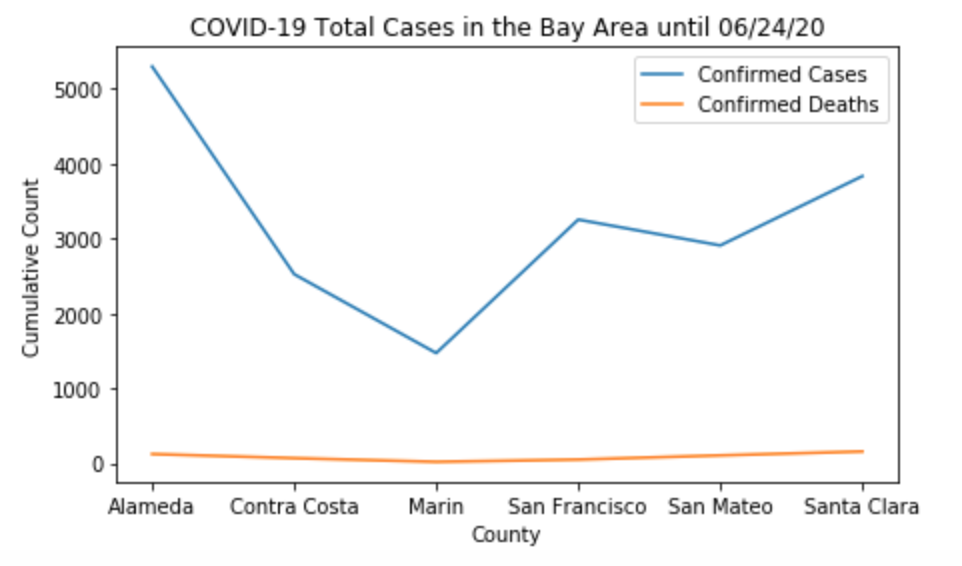

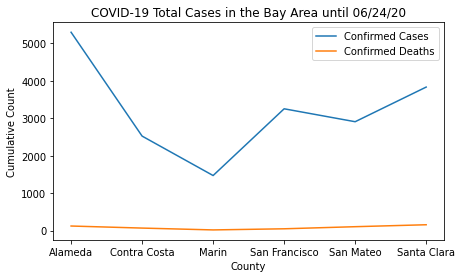

In [7]:
# Answer 5
fig = plt.figure(figsize=(7,4))
bay_counts_062420 = bay_area_counts[bay_area_counts['date'] == '2020-06-24']
plt.plot(np.arange(6), bay_counts_062420['cases'].tolist(), label= "Confirmed Cases")
plt.plot(np.arange(6), bay_counts_062420['deaths'].tolist(), label= "Confirmed Deaths")
plt.xticks(np.arange(6), bay_counts_062420['county'])
plt.title("COVID-19 Total Cases in the Bay Area until 06/24/20")
plt.xlabel("County")
plt.ylabel("Cumulative Count")
plt.legend();

### Question 6a:

Create a line plot for the number of confirmed cases in the Bay Area counties. Each line should represent a different county and show the legend of counties in the plot. The x-axis should denote the date, and the y-axis shows the total count til date.

Hint: you will need to convert the "date" column to a datetime object using the [pd.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) function.

Your graph should look like this:

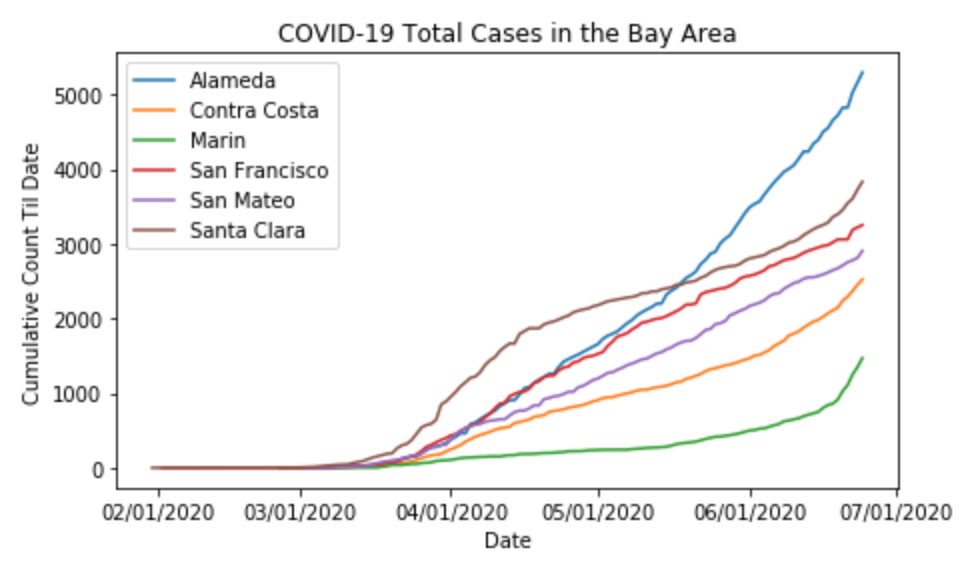

/Users/jahnavisingh/anaconda3/envs/PH244/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


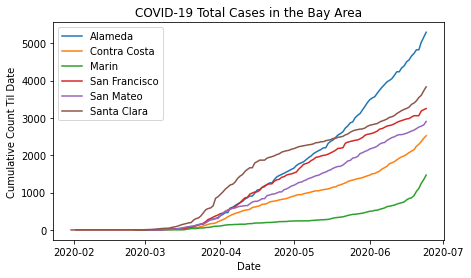

In [8]:
# Answer 6a 
bay_area_counts['date_dt'] = pd.to_datetime(bay_area_counts['date'])

plt.figure(figsize=(7,4))

for county in bay_area_counties:
    county_counts = bay_area_counts[bay_area_counts['county'] == county]
    plt.plot(county_counts['date_dt'], county_counts['cases'], label=county)
    
plt.legend()
plt.title("COVID-19 Total Cases in the Bay Area")
plt.xlabel("Date")
plt.ylabel("Cumulative Count Til Date");

### Question 6b

Similar to Question 6a, create a line plot for the number of confirmed deaths in the Bay Area counties. 

Hint: your code should be almost exactly the same as Question 6a, except you are looking at the number of deaths rather than cases. 

Your graph should look like this:
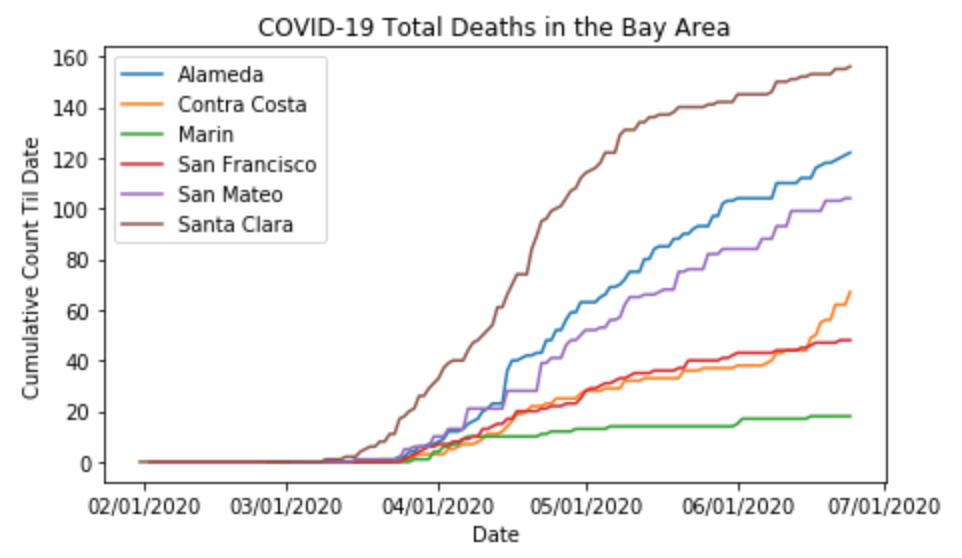

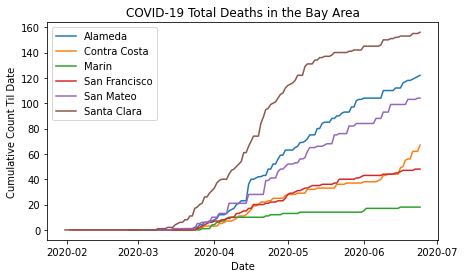

In [9]:
# Answer 6b 
plt.figure(figsize=(7,4))

for county in bay_area_counties:
    county_counts = bay_area_counts[bay_area_counts['county'] == county]
    plt.plot(county_counts['date_dt'], county_counts['deaths'], label=county)
    
plt.legend()
plt.title("COVID-19 Total Deaths in the Bay Area")
plt.xlabel("Date")
plt.ylabel("Cumulative Count Til Date");

### Question 6c

Create a plot with 2 horizontal subplots. Each subplot should be a lineplot, where the top line plot is the graph from Question 6a and the bottom line plot is the graph from Question 6b. 

Add subtitles for each subplot and a larger title for the whole plot. This [example](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html) might help.

Reminder: make sure to set "constrained_layout=True" in the subplots() function. 

Your graph should look like this:
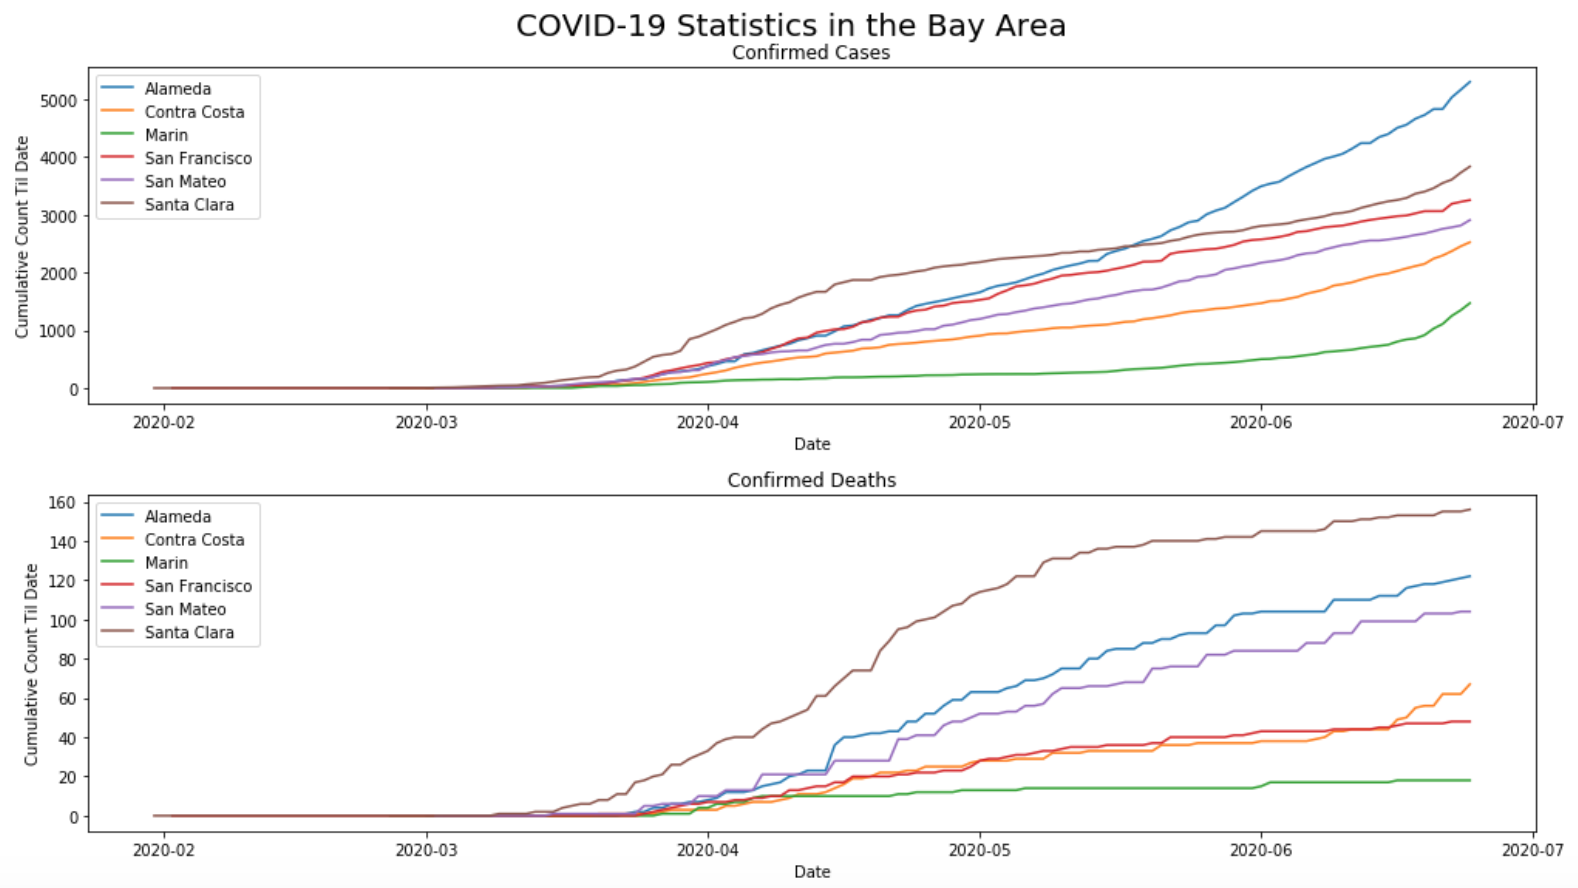

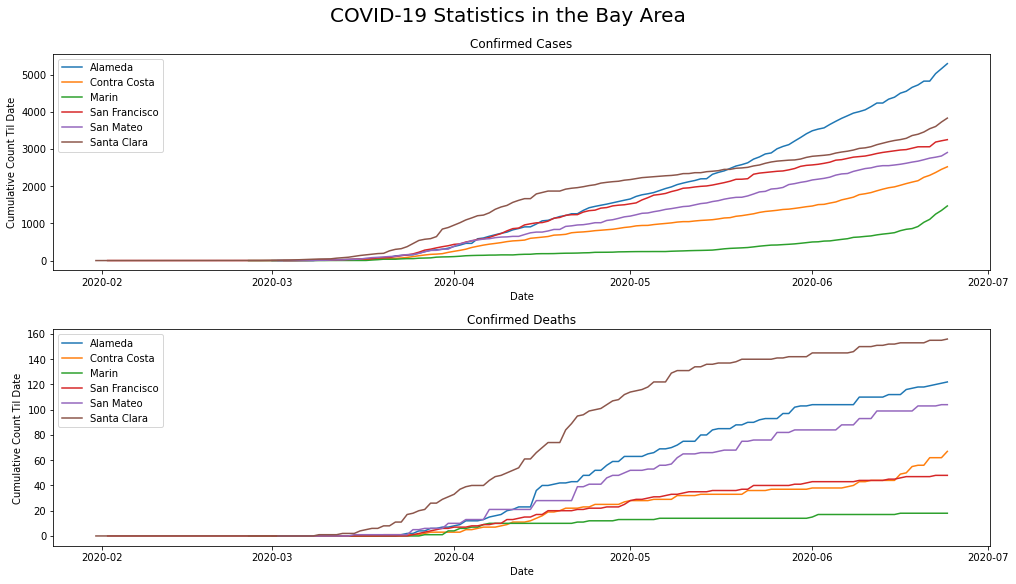

In [10]:
# Answer 6c
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(14,8), constrained_layout=True)

for county in bay_area_counties:
    county_counts = bay_area_counts[bay_area_counts['county'] == county]
    ax1.plot(county_counts['date_dt'], county_counts['cases'], label=county)
    
ax1.legend()
ax1.set_title("Confirmed Cases")
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative Count Til Date")

for county in bay_area_counties:
    county_counts = bay_area_counts[bay_area_counts['county'] == county]
    ax2.plot(county_counts['date_dt'], county_counts['deaths'], label=county)
    
ax2.legend()
ax2.set_title("Confirmed Deaths")
ax2.set_xlabel("Date")
ax2.set_ylabel("Cumulative Count Til Date")
fig.suptitle("COVID-19 Statistics in the Bay Area", fontsize=20);

## Part 2: Plotly

We will be using Plotly to build interactive maps and graphs. [Getting Started with Plotly in Python](https://towardsdatascience.com/getting-started-with-plot-ly-3c73706a837c) and the [Official Plot.ly Cheatsheet](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf) should help familiarize you with the syntax.

In [11]:
# Import the package
import plotly.graph_objects as go

### Question 7

Similar to question 5, graph the total confirmed cases and deaths for all 6 Bay Area counties as of 06/24/20 using a side-by-side bar plot in Plotly.

Title it "COVID-19 Total Cases in the Bay Area until 06/24/20". Title the x-axis as "County" and y-axis as "Cumulative Count". Your graph should look like:

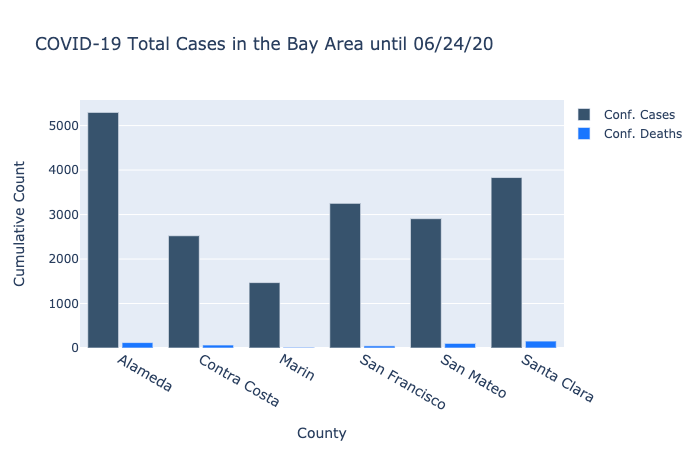

In [12]:
# Answer 7
fig = go.Figure(data=[
    go.Bar(name='Conf. Cases', x=bay_counts_062420['county'], y=bay_counts_062420['cases'],
          marker_color='rgb(55, 83, 109)'),
    go.Bar(name='Conf. Deaths', x=bay_counts_062420['county'], y=bay_counts_062420['deaths'],
          marker_color='rgb(26, 118, 255)')
])
# Change the bar mode
fig.update_layout(
    title="COVID-19 Total Cases in the Bay Area until 06/24/20",
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Cumulative Count',
    ),
    xaxis_title="County",
    legend=dict(
        x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

### Question 8

Graph the COVID-19 cases in the state of California as of 06/24/20 by county on a map. You can create a choropleth map or a different kind of map that you may like. These resources will be useful:

- [Using FIPS to Visualize in Plotly](https://towardsdatascience.com/using-fips-to-visualize-in-plotly-14fa7a6ddcf0)
- [Chorophleth Maps in Plotly](https://plotly.com/python/county-choropleth/)

Make sure to add a title, legend, and bin the number of cases by thousands.

Your graph should look like this:
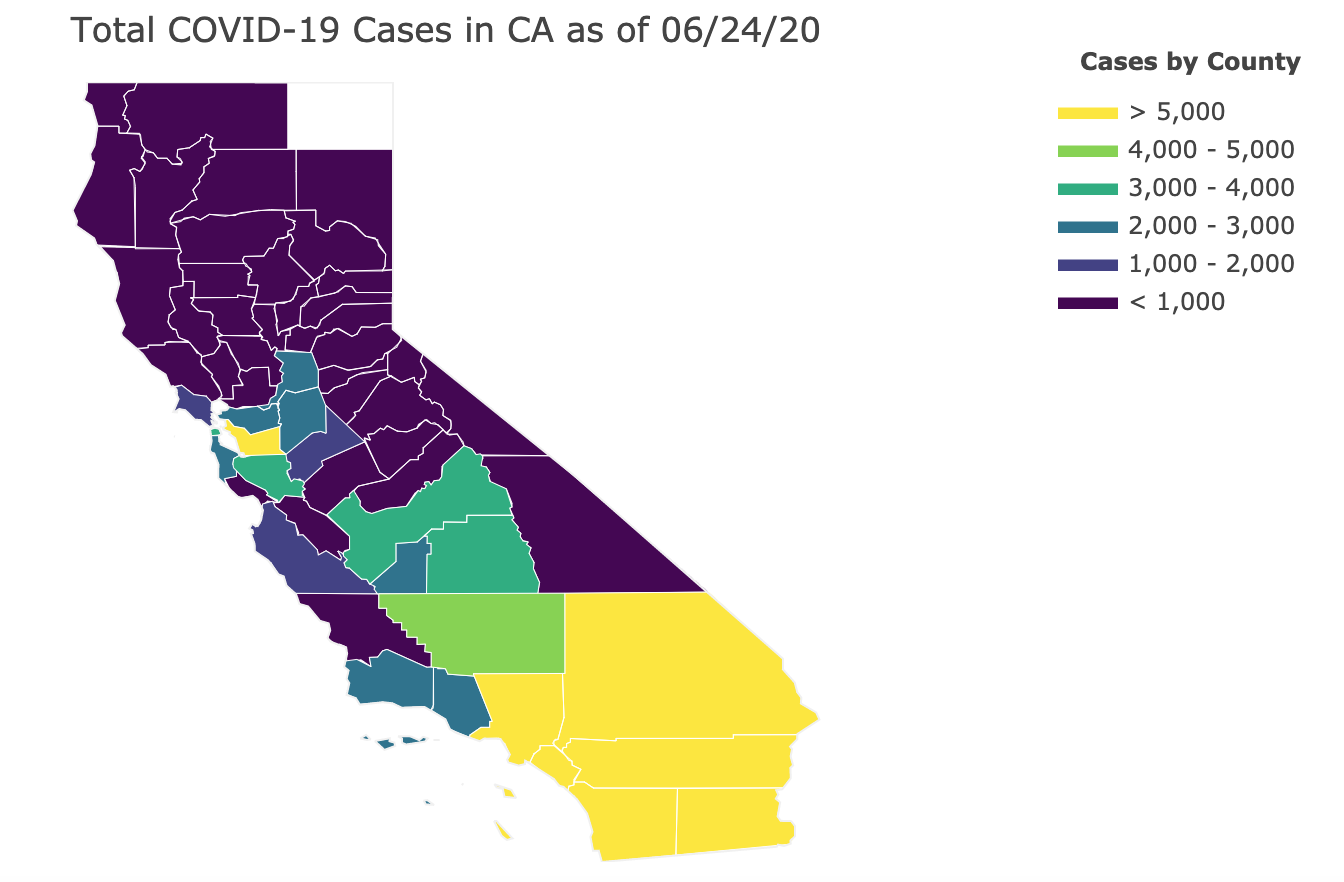

In [13]:
# Answer 8
import plotly.figure_factory as ff

ca_counts = covid_counts[(covid_counts['state'] == "California") & 
                           (covid_counts['date'] == '2020-06-24')]
values = ca_counts['cases'].tolist()
fips = ca_counts['fips'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[1000, 2000, 3000, 4000, 5000], show_hover=True,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Cases by County', title='Total COVID-19 Cases in CA as of 06/24/20'
)
fig.layout.template = None
fig.show()

### Question 9

Open-ended: Create your own informative visualization using this dataset, or you can import another COVID-19 dataset that you find! Try to explore creating different types of plots in Matplotlib, Seaborn, Plotly, or different packages like folium. [This example notebook](https://www.kaggle.com/fedi1996/covid-19-analysis-visualization-and-comparaisons) has a lot of really cool visualizations/ analysis that you can take inspiration from!

Here are some different kinds of visuals:

- Comprehensive Data Viz [Catalogue](https://datavizcatalogue.com/)
- Data Viz [Reference Guides](https://coolinfographics.com/dataviz-guides)

In [14]:
# Answer 9